In [ ]:
from transformers import  AutoTokenizer
import pandas as pd
import numpy as np
import torch
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/ML/EmoTrain.csv'
train_df = pd.read_csv(file_path,header = 0)

Due to large training dataset we do stratified sampling from training dataset

In [ ]:
train_df

,Unnamed: 0,text,praise,amusement,anger,disapproval,confusion,interest,sadness,fear,joy,love
0,0,Is there some scripture you could quote me? I'...,1,0,0,0,0,1,0,0,0,0
1,1,Good. Now we just need people to dislike commi...,1,0,0,0,0,0,0,0,0,0
2,2,This was driving me NUTS!,0,1,0,0,0,0,0,0,0,0
3,3,Thank you for your advice!,0,0,0,0,0,0,0,0,0,1
4,4,Some do. Some don't. Blanket generalizations a...,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
190097,190097,They needed to insert the phrase “over mainten...,0,0,0,0,1,0,0,0,0,0
190098,190098,Back in the seventies and eighties we all did ...,1,0,0,0,0,0,0,0,0,0
190099,190099,"6lbs is a lap dog, if someone shoots that caus...",0,0,0,0,0,0,0,1,0,0
190100,190100,This gets much worse on the 2nd loop.,0,0,0,0,1,0,0,0,0,0


In [ ]:
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')

In [ ]:
print(train_df.dtypes)

text           object
praise          int64
amusement       int64
anger           int64
disapproval     int64
confusion       int64
interest        int64
sadness         int64
fear            int64
joy             int64
love            int64
dtype: object


In [ ]:
train_df['label_sum'] = train_df.iloc[:, 1:].sum(axis=1)
train_df

,text,praise,amusement,anger,disapproval,confusion,interest,sadness,fear,joy,love,label_sum
0,Is there some scripture you could quote me? I'...,1,0,0,0,0,1,0,0,0,0,2
1,Good. Now we just need people to dislike commi...,1,0,0,0,0,0,0,0,0,0,1
2,This was driving me NUTS!,0,1,0,0,0,0,0,0,0,0,1
3,Thank you for your advice!,0,0,0,0,0,0,0,0,0,1,1
4,Some do. Some don't. Blanket generalizations a...,0,0,1,1,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
190097,They needed to insert the phrase “over mainten...,0,0,0,0,1,0,0,0,0,0,1
190098,Back in the seventies and eighties we all did ...,1,0,0,0,0,0,0,0,0,0,1
190099,"6lbs is a lap dog, if someone shoots that caus...",0,0,0,0,0,0,0,1,0,0,1
190100,This gets much worse on the 2nd loop.,0,0,0,0,1,0,0,0,0,0,1


In [ ]:
print(train_df['label_sum'].value_counts())  # Count occurrences of each sum

label_sum
1    159291
2     25086
0      3058
3      2399
4       213
5        37
6        12
8         3
7         2
9         1
Name: count, dtype: int64


In [ ]:

valid_sums = train_df['label_sum'].value_counts()
valid_sums = valid_sums[valid_sums > 1].index  # Keep only values with at least 2 samples
train_df = train_df[train_df['label_sum'].isin(valid_sums)]


In [ ]:
sample_size = 60000

# Stratified sampling
sampled_train_df, _ = train_test_split(
    train_df,
    train_size=sample_size,
    stratify=train_df['label_sum'],  # Stratify based on the sum of labels
    random_state=42
)


sampled_train_df = sampled_train_df.drop(columns=['label_sum'])


In [ ]:

train_df = sampled_train_df

In [ ]:
train_df

,text,praise,amusement,anger,disapproval,confusion,interest,sadness,fear,joy,love
41006,Be prepared for bad news just in case,0,0,0,0,0,0,0,0,0,1
160956,"Agreed. To add, we also need to see how coachi...",1,0,0,0,0,0,0,0,0,0
2787,The shocking conclusion.,0,0,0,0,1,0,0,0,0,0
145242,Seriously? I couldn't even remember the dude's...,0,0,0,0,1,0,0,0,0,0
36124,I know I haven't been myself lately but listen...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
175695,[NAME] is a socialist I believe. He also seems...,0,0,0,0,1,0,0,0,0,0
168417,I thought [NAME] was secretly gay to these peo...,0,0,0,0,0,0,0,0,1,0
170941,Haha! It didn’t HAVE to be but I didn’t want a...,0,1,0,1,0,0,0,0,0,0
171240,Maybe even prettier!,0,0,0,0,1,0,0,0,0,0


In [ ]:
#train_df = train_df.sample(frac=0.1, random_state=42)

In [ ]:
file_path = '/content/drive/MyDrive/ML/EmoVal.csv'
validate_df = pd.read_csv(file_path,header = 0)

In [ ]:
#train_df = pd.read_csv('EmoTrain.csv',header = 0)
#validate_df = pd.read_csv('EmoVal.csv',header = 0)

In [ ]:

labels = list(train_df.columns[1:])
train_texts = train_df['text'].tolist()  # Extract texts from train set
train_labels = train_df.iloc[:, 1:].values

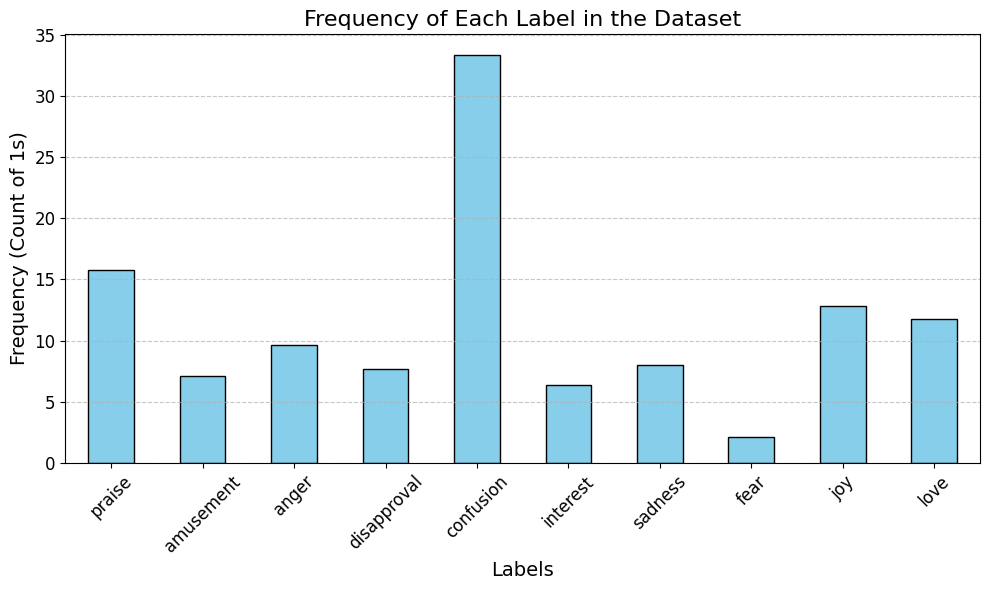

In [ ]:
import matplotlib.pyplot as plt
label_frequencies = (train_df.iloc[:, 1:].sum()/len(train_df))*100


plt.figure(figsize=(10, 6))
label_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Each Label in the TrainDataset', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Frequency (Count of 1s)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

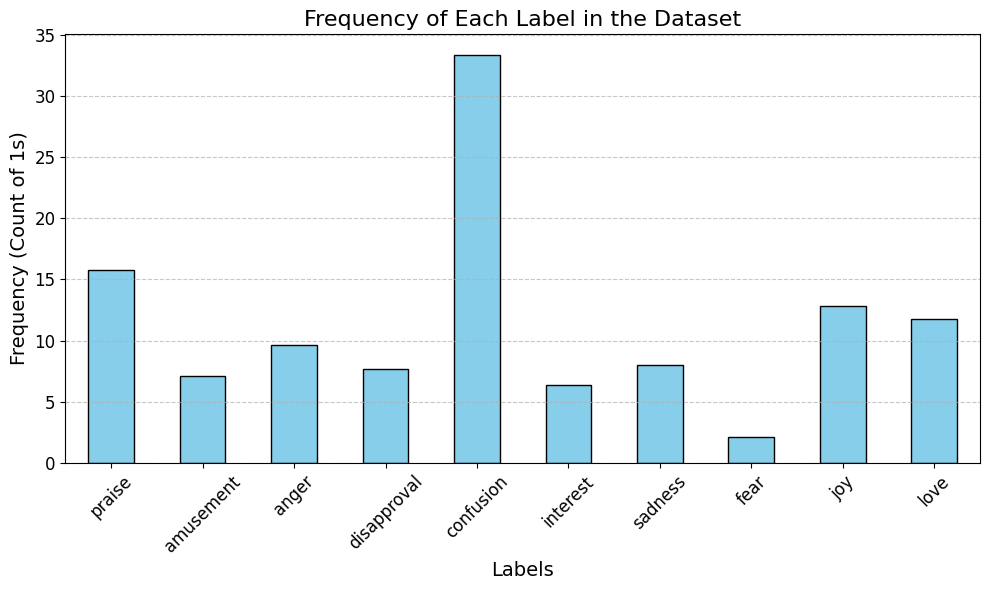

In [ ]:
import matplotlib.pyplot as plt
label_frequencies = (train_df.iloc[:, 1:].sum()/len(train_df))*100


plt.figure(figsize=(10, 6))
label_frequencies.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Frequency of Each Label in the ValidationDataset', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Frequency (Count of 1s)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()

In [ ]:
train_texts[10]


'Feels good to be a Nets fan right now'

In [ ]:
labels

['praise',
 'amusement',
 'anger',
 'disapproval',
 'confusion',
 'interest',
 'sadness',
 'fear',
 'joy',
 'love']

In [ ]:
id2label = {idx:label for idx, label in enumerate(labels)}
label2id = label2id = {label:idx for idx, label in enumerate(labels)}
id2label
label2id

{'praise': 0,
 'amusement': 1,
 'anger': 2,
 'disapproval': 3,
 'confusion': 4,
 'interest': 5,
 'sadness': 6,
 'fear': 7,
 'joy': 8,
 'love': 9}

In [ ]:
validate_df = validate_df.drop(columns=['Unnamed: 0'], errors='ignore')
val_texts = validate_df['text'].tolist()  # Extract texts from validation set
val_labels = validate_df.iloc[:, 1:].values

In [ ]:
train_df['text']

,text
41006,Be prepared for bad news just in case
160956,"Agreed. To add, we also need to see how coachi..."
2787,The shocking conclusion.
145242,Seriously? I couldn't even remember the dude's...
36124,I know I haven't been myself lately but listen...
...,...
175695,[NAME] is a socialist I believe. He also seems...
168417,I thought [NAME] was secretly gay to these peo...
170941,Haha! It didn’t HAVE to be but I didn’t want a...
171240,Maybe even prettier!


In [ ]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 w

In [ ]:
from datasets import Dataset
train_dataset = Dataset.from_pandas(train_df)
val_dataset = Dataset.from_pandas(validate_df)

# Inspect the dataset
print(train_dataset)
print(val_dataset)

Dataset({
    features: ['text', 'praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love', '__index_level_0__'],
    num_rows: 60000
})
Dataset({
    features: ['text', 'praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love'],
    num_rows: 10562
})


In [ ]:
!pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 11.3 MB/s eta 0:00:00


In [ ]:
import emoji
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def preprocess_data(examples):
    # Extract the "text" column for tokenization
    examples["text"] = [emoji.demojize(text) for text in examples["text"]]
    text = examples['text']

    # Tokenize the text
    encoding = tokenizer(text, padding="max_length", truncation=True, max_length=128)

    # Process labels
    labels_matrix = np.zeros((len(text), len(labels)))  # Shape: (batch_size, num_labels)
    for idx, label in enumerate(labels):
        labels_matrix[:, idx] = examples[label]  # Extract label columns

    encoding["labels"] = labels_matrix.tolist()

    return encoding


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
encoded_train = train_dataset.map(preprocess_data, batched=True, remove_columns=train_dataset.column_names)

encoded_val = val_dataset.map(preprocess_data, batched=True, remove_columns=val_dataset.column_names)


print(encoded_train)
print(encoded_val)

Map:   0%|          | 0/60000 [00:00<?, ? examples/s]

Map:   0%|          | 0/10562 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 60000
})
Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10562
})


In [ ]:
encoded_train['labels']

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0,

In [ ]:
example = encoded_train['input_ids'][0]
print(example)


[101, 2022, 4810, 2005, 2919, 2739, 2074, 1999, 2553, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
tokenizer.decode(example)

'[CLS] be prepared for bad news just in case [SEP] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]'

In [ ]:
encoded_train.set_format("torch")
encoded_val.set_format("torch")

In [ ]:
encoded_train._format_type

'torch'

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased",
                                                           problem_type="multi_label_classification",
                                                           num_labels=len(labels),
                                                           id2label=id2label,
                                                           label2id=label2id)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
batch_size = 16
metric_name = "f1"

In [ ]:
from transformers import TrainingArguments, Trainer

args = TrainingArguments(
    f"distilbert-finetuned",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to="none",
    metric_for_best_model=metric_name,
    #push_to_hub=True,
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score, accuracy_score
import torch
import numpy as np
from transformers import EvalPrediction

def multi_label_metrics(predictions, labels, threshold=0.5):
    """Computes multi-label classification metrics."""
    sigmoid = torch.nn.Sigmoid()
    probs = sigmoid(torch.Tensor(predictions))

    # Apply threshold to obtain binary labels
    y_pred = (probs >= threshold).numpy()
    y_true = labels

    # Compute micro and weighted metrics
    f1 = f1_score(y_true, y_pred, average='micro')
    f1_weighted = f1_score(y_true, y_pred, average='weighted')
    precision_micro = precision_score(y_true, y_pred, average='micro', zero_division=0)
    precision_weighted = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall_micro = recall_score(y_true, y_pred, average='micro', zero_division=0)
    recall_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    roc_auc = roc_auc_score(y_true, y_pred, average='micro')
    accuracy = accuracy_score(y_true, y_pred)

    return {
        "f1": f1,
        "f1_weighted": f1_weighted,
        "precision_micro": precision_micro,
        "precision_weighted": precision_weighted,
        "recall_micro": recall_micro,
        "recall_weighted": recall_weighted,
        "roc_auc": roc_auc,
        "accuracy": accuracy
    }

def compute_metrics(p: EvalPrediction):
    preds = p.predictions[0] if isinstance(p.predictions,
            tuple) else p.predictions
    result = multi_label_metrics(
        predictions=preds,
        labels=p.label_ids)
    return result


In [ ]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_train,
    eval_dataset=encoded_val,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

<ipython-input-39-38cdba1a9231>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.251000,0.244799,0.413191,0.641436,0.284700
2,0.237100,0.245614,0.435838,0.654904,0.304014
3,0.217500,0.250512,0.460815,0.671661,0.332039
4,0.199700,0.259350,0.468625,0.679270,0.352774
5,0.188700,0.267732,0.469203,0.682249,0.355425


TrainOutput(global_step=18750, training_loss=0.22185414632161457, metrics={'train_runtime': 1834.4434, 'train_samples_per_second': 163.537, 'train_steps_per_second': 10.221, 'total_flos': 9936472320000000.0, 'train_loss': 0.22185414632161457, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

{'eval_loss': 0.26773208379745483,
 'eval_f1': 0.4692028985507246,
 'eval_roc_auc': 0.6822486617616077,
 'eval_accuracy': 0.3554251088808938,
 'eval_runtime': 17.969,
 'eval_samples_per_second': 587.792,
 'eval_steps_per_second': 36.786,
 'epoch': 5.0}

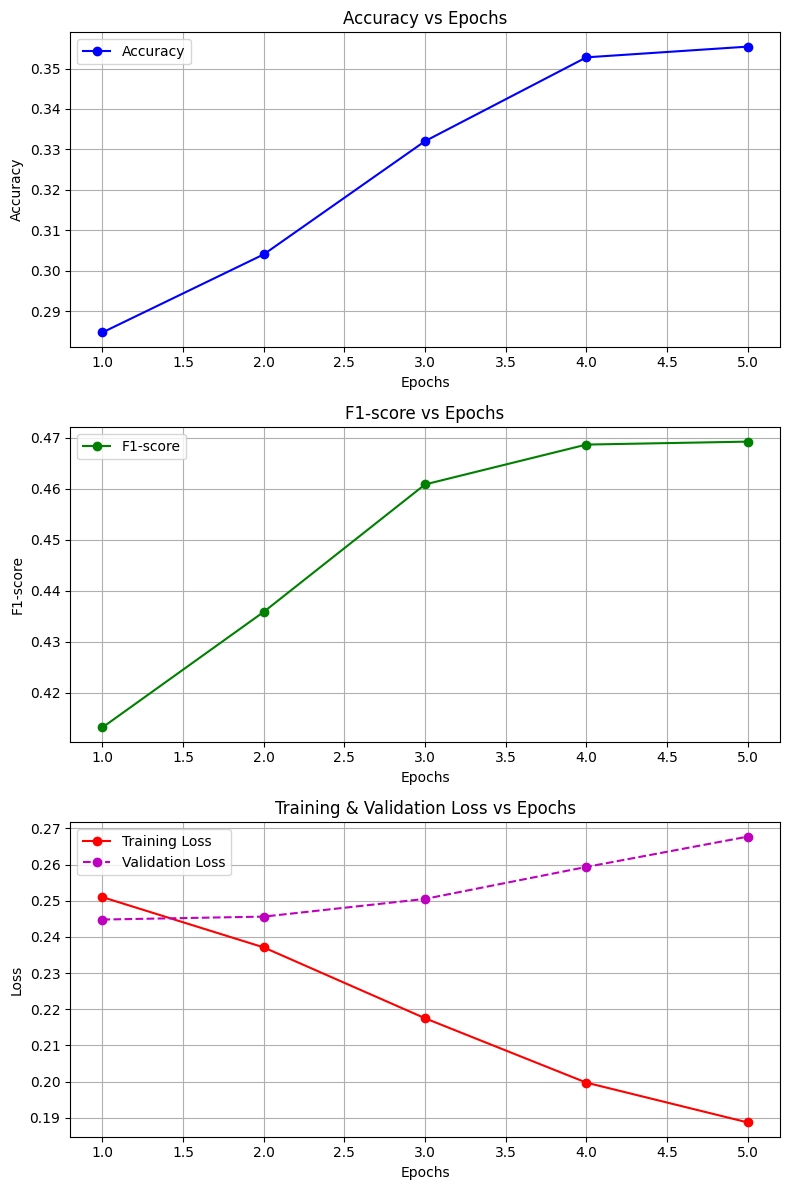

In [ ]:
import matplotlib.pyplot as plt

# Data extracted from the table
epochs = [1, 2, 3, 4, 5]
training_loss = [0.251000, 0.237100, 0.217500, 0.199700, 0.188700]
validation_loss = [0.244799, 0.245614, 0.250512, 0.259350, 0.267732]
accuracy = [0.284700, 0.304014, 0.332039, 0.352774, 0.355425]
f1_score = [0.413191, 0.435838, 0.460815, 0.468625, 0.469203]

# Create subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot Accuracy vs Epochs
axs[0].plot(epochs, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
axs[0].set_title("Accuracy vs Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid()

# Plot F1-score vs Epochs
axs[1].plot(epochs, f1_score, marker='o', linestyle='-', color='g', label='F1-score')
axs[1].set_title("F1-score vs Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("F1-score")
axs[1].legend()
axs[1].grid()

# Plot Training & Validation Loss vs Epochs
axs[2].plot(epochs, training_loss, marker='o', linestyle='-', color='r', label='Training Loss')
axs[2].plot(epochs, validation_loss, marker='o', linestyle='--', color='m', label='Validation Loss')
axs[2].set_title("Training & Validation Loss vs Epochs")
axs[2].set_xlabel("Epochs")
axs[2].set_ylabel("Loss")
axs[2].legend()
axs[2].grid()

# Show plots
plt.tight_layout()
plt.show()


In [ ]:
text = "criterion is such a great company though. i'm realy hoping they got they new streaming service up and running soon. "

text = emoji.demojize(text)
encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [ ]:
encoding.items()

dict_items([('input_ids', tensor([[  101, 19229,  2003,  2107,  1037,  2307,  2194,  2295,  1012,  1045,
          1005,  1049,  2613,  2100,  5327,  2027,  2288,  2027,  2047, 11058,
          2326,  2039,  1998,  2770,  2574,  1012,   102]], device='cuda:0')), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1]], device='cuda:0'))])

In [ ]:
logits = outputs.logits
logits.shape

torch.Size([1, 10])

In [ ]:
# apply sigmoid + threshold
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)] = 1

predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)
probs

['praise']


tensor([0.9251, 0.0114, 0.0026, 0.0070, 0.0289, 0.0812, 0.0050, 0.0018, 0.2821,
        0.0576], grad_fn=<SigmoidBackward0>)

In [ ]:
import os
output_dir = "/content/drive/MyDrive/first_model"

In [ ]:
first_model_dir = os.path.join(output_dir, "first_model")

In [ ]:
# Save the final model
model.save_pretrained(first_model_dir)
tokenizer.save_pretrained(first_model_dir)
print("First model saved at:", first_model_dir)

First model saved at: /content/drive/MyDrive/first_model/first_model


In [ ]:
from google.colab import drive
import json

# Mount Google Drive
#drive.mount('/content/drive')
# Load model configuration
config = model.config
# Save hyperparameters to a JSON file
hyperparams = {
    "model_name": "distilbert-base-uncased",
    "num_labels": config.num_labels,
    "hidden_dropout": getattr(config, "hidden_dropout_prob", "N/A"),
    "attention_dropout": getattr(config, "attention_probs_dropout_prob", "N/A"),
    "batch_size_train": args.per_device_train_batch_size,
    "batch_size_eval": args.per_device_eval_batch_size,
    "learning_rate": args.learning_rate,
    "epochs": args.num_train_epochs,
    "weight_decay": args.weight_decay,
    "save_strategy": args.save_strategy,
    "metric_for_best_model": args.metric_for_best_model
}

save_path = "/content/drive/MyDrive/first_hyperparameters.json"

with open(save_path, "w") as f:
    json.dump(hyperparams, f, indent=4)

print(f"✅ Hyperparameters saved to {save_path}")


✅ Hyperparameters saved to /content/drive/MyDrive/first_hyperparameters.json


In [ ]:
#!zip -r first_model.zip first_model

# Download the zip file
#from google.colab import files
#files.download("first_model.zip")

**Now we want to perform hyperparameter search**


Due to large training dataset we do stratified sampling from training dataset

In [ ]:
encoded_val

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10562
})

In [ ]:
encoded_train

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 60000
})

**Model Init**

In [ ]:
import os
output_dir = "/content/drive/MyDrive/hyperparameter_search_models"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
from transformers import AutoConfig, AutoModelForSequenceClassification
def model_init(trial=None):
    """Initializes the model with hyperparameters from the trial if provided"""

    # Use best hyperparameters if a trial is provided, else use default values
    dropout = trial.suggest_float("dropout", 0.1, 0.5) if trial else 0.1  # Default dropout = 0.1

    # Load model config with correct dropout settings
    config = AutoConfig.from_pretrained(
        "distilbert-base-uncased",
        problem_type="multi_label_classification",
        num_labels=len(labels),
        id2label=id2label,
        label2id=label2id,
        hidden_dropout=dropout,
    )

    return AutoModelForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        config=config
    )

In [ ]:
def hp_space_optuna(trial):
    return {
        "learning_rate": trial.suggest_float("learning_rate", 1e-5, 5e-4, log=True),
        "per_device_train_batch_size": trial.suggest_categorical("per_device_train_batch_size", [32, 64]),
        "weight_decay": trial.suggest_float("weight_decay", 0.01, 0.1),
        "num_train_epochs": trial.suggest_categorical("num_train_epochs", [3, 5, 10]),
        "warmup_steps": trial.suggest_int("warmup_steps", 0, 500),
        "adam_beta1": trial.suggest_float("adam_beta1", 0.8, 0.99),
        "adam_beta2": trial.suggest_float("adam_beta2", 0.9, 0.999),
        "label_smoothing_factor": trial.suggest_float("label_smoothing_factor", 0.0, 0.2),
    }


In [ ]:
args = TrainingArguments(
    output_dir="/content/drive/MyDrive/hyperparameter_search_models",
    eval_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    greater_is_better=True,
    logging_dir="./logs",
    logging_steps=100,
    report_to="none",
    save_total_limit=1,
)

In [ ]:
from transformers import EarlyStoppingCallback

trainer = Trainer(
    model_init=model_init,
    args=args,
    train_dataset=encoded_train,
    eval_dataset=encoded_val,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=3)]
)


<ipython-input-60-ca4e1253bef2>:3: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 383.4/383.4 kB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 8.8 MB/s eta 0:00:00


In [ ]:
best_run = trainer.hyperparameter_search(
    direction="maximize",
    hp_space=hp_space_optuna,
    backend="optuna",
    n_trials=10,
)

[I 2025-01-30 06:19:11,159] A new study created in memory with name: no-name-77b8e1c7-a3be-4d86-bfe3-dffa357bc396
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.257800,0.253622,0.361712,0.616752,0.232153
2,0.244100,0.252474,0.388348,0.630407,0.255728
3,0.222400,0.257604,0.440508,0.661072,0.317553
4,0.188400,0.282128,0.450369,0.672397,0.338099
5,0.155100,0.324204,0.447830,0.676942,0.340466


[I 2025-01-30 06:44:23,546] Trial 0 finished with value: 1.4652386010765905 and parameters: {'learning_rate': 0.00021478906595778462, 'per_device_train_batch_size': 64, 'weight_decay': 0.06293055724241253, 'num_train_epochs': 5, 'warmup_steps': 372, 'adam_beta1': 0.9183306041646961, 'adam_beta2': 0.9330403033718415, 'label_smoothing_factor': 0.11337974040808721, 'dropout': 0.4886123771688742}. Best is trial 0 with value: 1.4652386010765905.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.261700,0.257565,0.305894,0.592908,0.188979
2,0.248200,0.252132,0.389737,0.630301,0.260557
3,0.234200,0.254714,0.448699,0.664007,0.327400
4,0.195800,0.270710,0.455369,0.672554,0.341223
5,0.175600,0.301245,0.455023,0.677131,0.345768


[I 2025-01-30 07:10:54,610] Trial 1 finished with value: 1.4779219431434285 and parameters: {'learning_rate': 0.00020771709143860683, 'per_device_train_batch_size': 32, 'weight_decay': 0.09726297681932156, 'num_train_epochs': 5, 'warmup_steps': 301, 'adam_beta1': 0.883110434139293, 'adam_beta2': 0.973952262854438, 'label_smoothing_factor': 0.03615879360529406, 'dropout': 0.24391859312189254}. Best is trial 1 with value: 1.4779219431434285.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.252700,0.247599,0.422586,0.646831,0.296251
2,0.243900,0.246254,0.410762,0.640810,0.276747
3,0.233300,0.250238,0.442293,0.660796,0.311399
4,0.208700,0.253305,0.462117,0.673230,0.342170
5,0.202800,0.265110,0.456057,0.673672,0.341886
6,0.184000,0.276916,0.455981,0.676697,0.347472
7,0.177200,0.291586,0.451012,0.677036,0.339330


[I 2025-01-30 07:47:58,430] Trial 2 finished with value: 1.4673780461378256 and parameters: {'learning_rate': 2.182057562105213e-05, 'per_device_train_batch_size': 32, 'weight_decay': 0.046642142141277876, 'num_train_epochs': 10, 'warmup_steps': 467, 'adam_beta1': 0.939471738538624, 'adam_beta2': 0.9131104208086224, 'label_smoothing_factor': 0.08849284637946704, 'dropout': 0.40925738686166957}. Best is trial 1 with value: 1.4779219431434285.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.254700,0.250101,0.391970,0.630970,0.267374
2,0.244300,0.247544,0.408334,0.639788,0.274380
3,0.232400,0.246784,0.440170,0.658686,0.309979
4,0.217700,0.248778,0.458143,0.670064,0.338478
5,0.208800,0.251633,0.462185,0.673387,0.342170


[I 2025-01-30 08:13:12,582] Trial 3 finished with value: 1.4777427936616334 and parameters: {'learning_rate': 2.751041184318439e-05, 'per_device_train_batch_size': 64, 'weight_decay': 0.03756089147486323, 'num_train_epochs': 5, 'warmup_steps': 307, 'adam_beta1': 0.8727919503382298, 'adam_beta2': 0.9846601499082248, 'label_smoothing_factor': 0.05688918284560771, 'dropout': 0.2450504661930807}. Best is trial 1 with value: 1.4779219431434285.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.259700,0.256657,0.320110,0.598744,0.202045
2,0.247400,0.252314,0.400447,0.636280,0.267184
3,0.230000,0.258700,0.445067,0.663615,0.324560
4,0.191200,0.275453,0.453021,0.672219,0.340939
5,0.167400,0.310180,0.451523,0.676823,0.345294


[I 2025-01-30 08:40:02,890] Trial 4 finished with value: 1.473640354114844 and parameters: {'learning_rate': 0.00018632053381098683, 'per_device_train_batch_size': 32, 'weight_decay': 0.038488310302389556, 'num_train_epochs': 5, 'warmup_steps': 456, 'adam_beta1': 0.9109569414100942, 'adam_beta2': 0.9832079470810183, 'label_smoothing_factor': 0.19593804172728524, 'dropout': 0.28134565695402874}. Best is trial 1 with value: 1.4779219431434285.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.253500,0.247728,0.392116,0.630713,0.259799
2,0.236300,0.246490,0.427472,0.650109,0.293884
3,0.207800,0.257902,0.464017,0.676315,0.346999


[I 2025-01-30 08:56:10,270] Trial 5 finished with value: 1.4873308629583872 and parameters: {'learning_rate': 0.00011544903776737924, 'per_device_train_batch_size': 32, 'weight_decay': 0.06697008807039016, 'num_train_epochs': 3, 'warmup_steps': 251, 'adam_beta1': 0.931083141105053, 'adam_beta2': 0.9487021239307476, 'label_smoothing_factor': 0.1576084210666851, 'dropout': 0.13109274636454687}. Best is trial 5 with value: 1.4873308629583872.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.255100,0.250168,0.364058,0.617660,0.235940


[I 2025-01-30 09:01:10,307] Trial 6 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.251900,0.247892,0.401820,0.635583,0.276084
2,0.242200,0.245718,0.415701,0.643585,0.282806
3,0.228700,0.247851,0.454485,0.667155,0.330240
4,0.210300,0.254044,0.457792,0.670356,0.337247
5,0.196300,0.267164,0.451046,0.671416,0.333933


[I 2025-01-30 09:26:17,595] Trial 7 pruned. 
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.251300,0.245227,0.426215,0.648652,0.295304
2,0.238000,0.246202,0.419438,0.645783,0.284037
3,0.219600,0.254810,0.453182,0.668980,0.325980
4,0.187200,0.269497,0.462747,0.678586,0.353058
5,0.175200,0.285473,0.459711,0.680261,0.347851


[I 2025-01-30 09:53:07,113] Trial 8 finished with value: 1.4878231900468148 and parameters: {'learning_rate': 4.76615470511797e-05, 'per_device_train_batch_size': 32, 'weight_decay': 0.03243883100066434, 'num_train_epochs': 5, 'warmup_steps': 269, 'adam_beta1': 0.9409099735830508, 'adam_beta2': 0.9511026385031478, 'label_smoothing_factor': 0.04137677556057702, 'dropout': 0.4862410311095663}. Best is trial 8 with value: 1.4878231900468148.
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.251000,0.245481,0.419050,0.644380,0.291138
2,0.239300,0.244767,0.429432,0.650864,0.296345
3,0.225400,0.245980,0.464669,0.673319,0.343590


[I 2025-01-30 10:09:16,671] Trial 9 finished with value: 1.4815784339458884 and parameters: {'learning_rate': 3.438799699387754e-05, 'per_device_train_batch_size': 32, 'weight_decay': 0.04847418103631424, 'num_train_epochs': 3, 'warmup_steps': 415, 'adam_beta1': 0.910382355168187, 'adam_beta2': 0.9651805044061114, 'label_smoothing_factor': 0.11046805043946946, 'dropout': 0.21984270118316984}. Best is trial 8 with value: 1.4878231900468148.


In [ ]:
print("Best hyperparameters:", best_run.hyperparameters)


Best hyperparameters: {'learning_rate': 4.76615470511797e-05, 'per_device_train_batch_size': 32, 'weight_decay': 0.03243883100066434, 'num_train_epochs': 5, 'warmup_steps': 269, 'adam_beta1': 0.9409099735830508, 'adam_beta2': 0.9511026385031478, 'label_smoothing_factor': 0.04137677556057702, 'dropout': 0.4862410311095663}


In [ ]:
import json

save_dir = "/content/drive/MyDrive/hyperparameter_search_models"

best_hyperparams_file = os.path.join(save_dir, "best_hyperparameters.json")
with open(best_hyperparams_file, "w") as f:
    json.dump(best_run.hyperparameters, f)

print(f"Best hyperparameters saved in Google Drive: {best_hyperparams_file}")

Best hyperparameters saved in Google Drive: /content/drive/MyDrive/hyperparameter_search_models/best_hyperparameters.json


In [ ]:
best_model_dir = os.path.join(output_dir, "best_model")

In [ ]:
for param, value in best_run.hyperparameters.items():
    setattr(trainer.args, param, value)
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,Roc Auc,Accuracy
1,0.251300,0.245227,0.426215,0.648652,0.295304
2,0.238000,0.246202,0.419438,0.645783,0.284037
3,0.219600,0.254810,0.453182,0.668980,0.325980
4,0.187200,0.269497,0.462747,0.678586,0.353058
5,0.175200,0.285473,0.459711,0.680261,0.347851


TrainOutput(global_step=9375, training_loss=0.21840502614339194, metrics={'train_runtime': 1616.6194, 'train_samples_per_second': 185.572, 'train_steps_per_second': 5.799, 'total_flos': 9936472320000000.0, 'train_loss': 0.21840502614339194, 'epoch': 5.0})

save best model on drive

In [ ]:
trainer.save_model(best_model_dir)
tokenizer.save_pretrained(best_model_dir)
print("Best model saved at:", best_model_dir)

Best model saved at: /content/drive/MyDrive/hyperparameter_search_models/best_model


In [ ]:
eval_results = trainer.evaluate()

In [ ]:
eval_results

{'eval_loss': 0.2694965898990631,
 'eval_f1': 0.46274660026814785,
 'eval_roc_auc': 0.678585798309078,
 'eval_accuracy': 0.35305813292936944,
 'eval_runtime': 20.4229,
 'eval_samples_per_second': 517.165,
 'eval_steps_per_second': 64.682,
 'epoch': 5.0}

In [ ]:
hyper_trainer = trainer

**Test on single text**

In [ ]:
text = "criterion is such a great company though. i'm realy hoping they got they new streaming service up and running soon. "

text = emoji.demojize(text)
encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [ ]:
# apply sigmoid + threshold
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)] = 1

predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)
probs

['praise']


tensor([0.9251, 0.0114, 0.0026, 0.0070, 0.0289, 0.0812, 0.0050, 0.0018, 0.2821,
        0.0576], grad_fn=<SigmoidBackward0>)

**Train on the full dataset with hyperparameters found in search**

In [ ]:
file_path = '/content/drive/MyDrive/ML/EmoTrain.csv'
train_df = pd.read_csv(file_path,header = 0)

In [ ]:
train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')

In [ ]:
train_df['text']

,text
0,Is there some scripture you could quote me? I'...
1,Good. Now we just need people to dislike commi...
2,This was driving me NUTS!
3,Thank you for your advice!
4,Some do. Some don't. Blanket generalizations a...
...,...
190097,They needed to insert the phrase “over mainten...
190098,Back in the seventies and eighties we all did ...
190099,"6lbs is a lap dog, if someone shoots that caus..."
190100,This gets much worse on the 2nd loop.


In [ ]:
train_dataset = Dataset.from_pandas(train_df)

In [ ]:
encoded_train = train_dataset.map(preprocess_data, batched=True, remove_columns=train_dataset.column_names)

Map:   0%|          | 0/190102 [00:00<?, ? examples/s]

In [ ]:
encoded_train.set_format("torch")

In [ ]:
encoded_train['labels']

tensor([[1., 0., 0.,  ..., 0., 0., 0.],
        [1., 0., 0.,  ..., 0., 0., 0.],
        [0., 1., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 1., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]])

In [ ]:
# Apply best hyperparameters
for param, value in best_run.hyperparameters.items():
    setattr(args, param, value)
args.label_smoothing_factor = 0.0

In [ ]:
trainer = Trainer(
    model_init=model_init,
    args=args,
    train_dataset=encoded_train,  # FULL DATASET NOW
    eval_dataset=encoded_val,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

<ipython-input-207-2dbe1d2ba981>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
trainer.train()

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch,Training Loss,Validation Loss,F1,F1 Weighted,Precision Micro,Precision Weighted,Recall Micro,Recall Weighted,Roc Auc,Accuracy
1,0.241500,0.240120,0.436872,0.416369,0.637633,0.632758,0.332259,0.332259,0.653919,0.305151
2,0.232800,0.238865,0.452425,0.436873,0.638115,0.623800,0.350446,0.350446,0.662371,0.321057
3,0.217700,0.241941,0.462204,0.447387,0.625600,0.609462,0.366485,0.366485,0.669059,0.334501
4,0.203400,0.250297,0.473093,0.461783,0.604840,0.590329,0.388476,0.388476,0.677825,0.349366
5,0.194000,0.261853,0.472690,0.464443,0.577047,0.564660,0.400298,0.400298,0.681175,0.352585


TrainOutput(global_step=29705, training_loss=0.22193341518447687, metrics={'train_runtime': 4835.3222, 'train_samples_per_second': 196.576, 'train_steps_per_second': 6.143, 'total_flos': 3.1482387682944e+16, 'train_loss': 0.22193341518447687, 'epoch': 5.0})

In [ ]:
output_dir = "/content/drive/MyDrive/final_emotion_model"
os.makedirs(output_dir, exist_ok=True)

In [ ]:
trainer.save_model(output_dir)  # Save model
tokenizer.save_pretrained(output_dir)  # Save tokenizer
print(f"Final model saved at {output_dir}")

Final model saved at /content/drive/MyDrive/final_emotion_model


In [ ]:
trainer.evaluate()

{'eval_loss': 0.25029662251472473,
 'eval_f1': 0.4730933803171407,
 'eval_f1_weighted': 0.46178322183046827,
 'eval_precision_micro': 0.6048397477152787,
 'eval_precision_weighted': 0.590328886676471,
 'eval_recall_micro': 0.3884755291005291,
 'eval_recall_weighted': 0.3884755291005291,
 'eval_roc_auc': 0.677824865187534,
 'eval_accuracy': 0.34936565044499146,
 'eval_runtime': 20.0603,
 'eval_samples_per_second': 526.512,
 'eval_steps_per_second': 65.851,
 'epoch': 5.0}

**Test on single text**

In [ ]:
text = "criterion is such a great company though. i'm realy hoping they got they new streaming service up and running soon. "

text = emoji.demojize(text)
encoding = tokenizer(text, return_tensors="pt")
encoding = {k: v.to(trainer.model.device) for k,v in encoding.items()}

outputs = trainer.model(**encoding)

In [ ]:
# apply sigmoid + threshold
sigmoid = torch.nn.Sigmoid()
probs = sigmoid(logits.squeeze().cpu())
predictions = np.zeros(probs.shape)
predictions[np.where(probs >= 0.5)] = 1

predicted_labels = [id2label[idx] for idx, label in enumerate(predictions) if label == 1.0]
print(predicted_labels)
probs

['praise']


tensor([0.9251, 0.0114, 0.0026, 0.0070, 0.0289, 0.0812, 0.0050, 0.0018, 0.2821,
        0.0576], grad_fn=<SigmoidBackward0>)

**Cross validation using best hyperparameters**

In [ ]:
import pandas as pd


train_df = pd.read_csv('/content/drive/MyDrive/ML/EmoTrain.csv', header=0)
validate_df = pd.read_csv('/content/drive/MyDrive/ML/EmoVal.csv', header=0)


train_df = train_df.drop(columns=['Unnamed: 0'], errors='ignore')
validate_df = validate_df.drop(columns=['Unnamed: 0'], errors='ignore')

# Merge both datasets
full_df = pd.concat([train_df, validate_df], axis=0).reset_index(drop=True)

# Print dataset size
print(f"Total dataset size after merging: {full_df.shape[0]} samples")

Total dataset size after merging: 200664 samples


In [ ]:
label_cols = list(full_df.columns[1:])
num_labels = len(label_cols)

X = full_df["text"].to_numpy()

y = full_df.iloc[:, 1:].to_numpy()


id2label = {i: lbl for i, lbl in enumerate(label_cols)}
label2id = {lbl: i for i, lbl in enumerate(label_cols)}

labels = label_cols

In [ ]:
X

array(["Is there some scripture you could quote me? I'd like to read up on it just to be sure for myself",
       'Good. Now we just need people to dislike commies more than they do now',
       'This was driving me NUTS!', ...,
       "Because they're having to compete and so we get exposed to the weakest of the bunch.",
       '>I don’t believe in changing the rules and laws however ... Then you believe [RELIGION] is in the 7th century for all times',
       'Not a perfect game with the error'], dtype=object)

**Cross Validation**

In [ ]:
k = 5
skf = StratifiedKFold(n_splits=k, shuffle=True, random_state=42)

# For storing results
f1_micro_scores = []
f1_weighted_scores = []
accuracy_scores = []
roc_auc_scores = []
precision_micro_scores = []
precision_weighted_scores = []
recall_micro_scores = []
recall_weighted_scores = []


for fold, (train_idx, val_idx) in enumerate(skf.split(X, y.sum(axis=1))):
    print(f"\n===== Fold {fold+1}/{k} =====")

    train_texts = X[train_idx]
    val_texts   = X[val_idx]
    train_labels = y[train_idx]
    val_labels   = y[val_idx]

    train_fold_df = pd.DataFrame({"text": train_texts})
    val_fold_df   = pd.DataFrame({"text": val_texts})


    for i, col_name in enumerate(label_cols):
        train_fold_df[col_name] = train_labels[:, i]
        val_fold_df[col_name]   = val_labels[:, i]

    train_dataset = Dataset.from_pandas(train_fold_df)
    val_dataset   = Dataset.from_pandas(val_fold_df)

    print("Dataset columns before preprocessing:", train_dataset.column_names)

    train_dataset = train_dataset.map(
        preprocess_data,
        batched=True,
        remove_columns=train_dataset.column_names
    )
    val_dataset = val_dataset.map(
        preprocess_data,
        batched=True,
        remove_columns=val_dataset.column_names
    )

    # Set format for PyTorch
    train_dataset.set_format("torch")
    val_dataset.set_format("torch")

    model = AutoModelForSequenceClassification.from_pretrained(
        "distilbert-base-uncased",
        problem_type="multi_label_classification",
        num_labels=num_labels,
        id2label=id2label,
        label2id=label2id
    )


    args = TrainingArguments(
        output_dir=f"/content/drive/MyDrive/cv_models/fold-{fold+1}",
        evaluation_strategy="epoch",
        save_strategy="epoch",
        learning_rate=best_run.hyperparameters["learning_rate"],
        per_device_train_batch_size=int(best_run.hyperparameters["per_device_train_batch_size"]),
        per_device_eval_batch_size=int(best_run.hyperparameters["per_device_train_batch_size"]),
        num_train_epochs=int(best_run.hyperparameters["num_train_epochs"]),
        weight_decay=best_run.hyperparameters["weight_decay"],
        load_best_model_at_end=True,
        metric_for_best_model="f1",  # If your compute_metrics returns "f1" as the main key
        greater_is_better=True,
        report_to="none",
        logging_dir=f"./logs/fold-{fold+1}",
        save_total_limit=1
    )


    trainer = Trainer(
        model=model,
        args=args,
        train_dataset=train_dataset,  # <--- per-fold datasets
        eval_dataset=val_dataset,     # <--- per-fold datasets
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )


    trainer.train()
    results = trainer.evaluate()

    f1_micro_scores.append(results["eval_f1"])
    f1_weighted_scores.append(results["eval_f1_weighted"])
    accuracy_scores.append(results["eval_accuracy"])
    roc_auc_scores.append(results["eval_roc_auc"])
    precision_micro_scores.append(results["eval_precision_micro"])
    precision_weighted_scores.append(results["eval_precision_weighted"])
    recall_micro_scores.append(results["eval_recall_micro"])
    recall_weighted_scores.append(results["eval_recall_weighted"])

    print(f"\nFold {fold+1} Scores:")
    print(f"  F1 (micro):          {results['eval_f1']:.4f}")
    print(f"  F1 (weighted):       {results['eval_f1_weighted']:.4f}")
    print(f"  Accuracy:            {results['eval_accuracy']:.4f}")
    print(f"  AUC-ROC:             {results['eval_roc_auc']:.4f}")
    print(f"  Precision (micro):   {results['eval_precision_micro']:.4f}")
    print(f"  Precision (weighted):{results['eval_precision_weighted']:.4f}")
    print(f"  Recall (micro):      {results['eval_recall_micro']:.4f}")
    print(f"  Recall (weighted):   {results['eval_recall_weighted']:.4f}")


print("\n===== Cross-Validation Results =====")
print(f"F1 Micro:     {np.mean(f1_micro_scores):.4f} ± {np.std(f1_micro_scores):.4f}")
print(f"F1 Weighted:  {np.mean(f1_weighted_scores):.4f} ± {np.std(f1_weighted_scores):.4f}")
print(f"Accuracy:     {np.mean(accuracy_scores):.4f} ± {np.std(accuracy_scores):.4f}")
print(f"AUC-ROC:      {np.mean(roc_auc_scores):.4f} ± {np.std(roc_auc_scores):.4f}")
print(f"Precision Micro:   {np.mean(precision_micro_scores):.4f} ± {np.std(precision_micro_scores):.4f}")
print(f"Precision Weighted:{np.mean(precision_weighted_scores):.4f} ± {np.std(precision_weighted_scores):.4f}")
print(f"Recall Micro:      {np.mean(recall_micro_scores):.4f} ± {np.std(recall_micro_scores):.4f}")
print(f"Recall Weighted:   {np.mean(recall_weighted_scores):.4f} ± {np.std(recall_weighted_scores):.4f}")

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(



===== Fold 1/5 =====
Dataset columns before preprocessing: ['text', 'praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love']


Map:   0%|          | 0/160531 [00:00<?, ? examples/s]

Map:   0%|          | 0/40133 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-231-b12e6c675612>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,F1,F1 Weighted,Precision Micro,Precision Weighted,Recall Micro,Recall Weighted,Roc Auc,Accuracy
1,0.243600,0.241294,0.443843,0.421446,0.637166,0.644330,0.340524,0.340524,0.657715,0.319288
2,0.232100,0.239729,0.465295,0.446470,0.632494,0.627934,0.368011,0.368011,0.670170,0.337901
3,0.220400,0.244696,0.461497,0.450489,0.609414,0.595866,0.371360,0.371360,0.670280,0.328358
4,0.204300,0.254204,0.468699,0.457574,0.593927,0.581437,0.387083,0.387083,0.676417,0.342561
5,0.189200,0.268229,0.466244,0.460905,0.561135,0.551844,0.398804,0.398804,0.679220,0.342312



Fold 1 Scores:
  F1 (micro):          0.4687
  F1 (weighted):       0.4576
  Accuracy:            0.3426
  AUC-ROC:             0.6764
  Precision (micro):   0.5939
  Precision (weighted):0.5814
  Recall (micro):      0.3871
  Recall (weighted):   0.3871

===== Fold 2/5 =====
Dataset columns before preprocessing: ['text', 'praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love']


Map:   0%|          | 0/160531 [00:00<?, ? examples/s]

Map:   0%|          | 0/40133 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-231-b12e6c675612>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,F1,F1 Weighted,Precision Micro,Precision Weighted,Recall Micro,Recall Weighted,Roc Auc,Accuracy
1,0.244300,0.241714,0.399964,0.375363,0.663842,0.658556,0.286199,0.286199,0.633723,0.266090
2,0.230800,0.240621,0.463830,0.440605,0.628815,0.622987,0.367426,0.367426,0.669680,0.340892
3,0.218500,0.246193,0.462032,0.449694,0.606677,0.596292,0.373081,0.373081,0.670891,0.330626
4,0.204000,0.254708,0.461678,0.453127,0.586277,0.571946,0.380758,0.380758,0.672994,0.332719
5,0.185900,0.268015,0.467668,0.460944,0.561854,0.551006,0.400526,0.400526,0.680055,0.345103



Fold 2 Scores:
  F1 (micro):          0.4677
  F1 (weighted):       0.4609
  Accuracy:            0.3451
  AUC-ROC:             0.6801
  Precision (micro):   0.5619
  Precision (weighted):0.5510
  Recall (micro):      0.4005
  Recall (weighted):   0.4005

===== Fold 3/5 =====
Dataset columns before preprocessing: ['text', 'praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love']


Map:   0%|          | 0/160531 [00:00<?, ? examples/s]

Map:   0%|          | 0/40133 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-231-b12e6c675612>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,F1,F1 Weighted,Precision Micro,Precision Weighted,Recall Micro,Recall Weighted,Roc Auc,Accuracy
1,0.242500,0.241487,0.442534,0.425503,0.644375,0.636049,0.336980,0.336980,0.656458,0.310592
2,0.231500,0.241339,0.453354,0.430749,0.634950,0.626049,0.352531,0.352531,0.663153,0.321680
3,0.217000,0.245078,0.459501,0.448282,0.619612,0.606118,0.365145,0.365145,0.668070,0.327312
4,0.204700,0.254879,0.461783,0.451844,0.590627,0.576523,0.379086,0.379086,0.672544,0.331872
5,0.188200,0.269171,0.469775,0.463410,0.562544,0.551868,0.403271,0.403271,0.681347,0.346573



Fold 3 Scores:
  F1 (micro):          0.4698
  F1 (weighted):       0.4634
  Accuracy:            0.3466
  AUC-ROC:             0.6813
  Precision (micro):   0.5625
  Precision (weighted):0.5519
  Recall (micro):      0.4033
  Recall (weighted):   0.4033

===== Fold 4/5 =====
Dataset columns before preprocessing: ['text', 'praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love']


Map:   0%|          | 0/160531 [00:00<?, ? examples/s]

Map:   0%|          | 0/40133 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-231-b12e6c675612>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,F1,F1 Weighted,Precision Micro,Precision Weighted,Recall Micro,Recall Weighted,Roc Auc,Accuracy
1,0.242900,0.241432,0.450018,0.428849,0.637658,0.630362,0.347701,0.347701,0.661067,0.320459


Epoch,Training Loss,Validation Loss,F1,F1 Weighted,Precision Micro,Precision Weighted,Recall Micro,Recall Weighted,Roc Auc,Accuracy
1,0.242900,0.241432,0.450018,0.428849,0.637658,0.630362,0.347701,0.347701,0.661067,0.320459
2,0.230700,0.242839,0.443161,0.427398,0.634665,0.622834,0.340438,0.340438,0.657540,0.308723
3,0.217600,0.246691,0.455471,0.443501,0.621247,0.607066,0.359532,0.359532,0.665584,0.322951
4,0.202600,0.256519,0.463719,0.454510,0.588117,0.576073,0.382758,0.382758,0.674036,0.335186
5,0.186900,0.269948,0.468500,0.462235,0.560465,0.550217,0.402462,0.402462,0.680810,0.347569



Fold 4 Scores:
  F1 (micro):          0.4685
  F1 (weighted):       0.4622
  Accuracy:            0.3476
  AUC-ROC:             0.6808
  Precision (micro):   0.5605
  Precision (weighted):0.5502
  Recall (micro):      0.4025
  Recall (weighted):   0.4025

===== Fold 5/5 =====
Dataset columns before preprocessing: ['text', 'praise', 'amusement', 'anger', 'disapproval', 'confusion', 'interest', 'sadness', 'fear', 'joy', 'love']


Map:   0%|          | 0/160532 [00:00<?, ? examples/s]

Map:   0%|          | 0/40132 [00:00<?, ? examples/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
<ipython-input-231-b12e6c675612>:101: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,F1,F1 Weighted,Precision Micro,Precision Weighted,Recall Micro,Recall Weighted,Roc Auc,Accuracy
1,0.242500,0.241563,0.455179,0.440146,0.628873,0.617861,0.356668,0.356668,0.664714,0.320293
2,0.230900,0.240700,0.443690,0.428434,0.634320,0.622436,0.341162,0.341162,0.657855,0.307460
3,0.218500,0.245692,0.464687,0.456870,0.609953,0.599101,0.375304,0.375304,0.672123,0.336041
4,0.203600,0.254411,0.459994,0.453222,0.590749,0.580240,0.376631,0.376631,0.671433,0.333076
5,0.189700,0.268066,0.467919,0.462312,0.564946,0.554953,0.399335,0.399335,0.679769,0.345759



Fold 5 Scores:
  F1 (micro):          0.4679
  F1 (weighted):       0.4623
  Accuracy:            0.3458
  AUC-ROC:             0.6798
  Precision (micro):   0.5649
  Precision (weighted):0.5550
  Recall (micro):      0.3993
  Recall (weighted):   0.3993

===== Cross-Validation Results =====
F1 Micro:     0.4685 ± 0.0007
F1 Weighted:  0.4613 ± 0.0020
Accuracy:     0.3455 ± 0.0017
AUC-ROC:      0.6797 ± 0.0017
Precision Micro:   0.5687 ± 0.0127
Precision Weighted:0.5579 ± 0.0119
Recall Micro:      0.3985 ± 0.0059
Recall Weighted:   0.3985 ± 0.0059


In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

# Data
epochs = [1, 2, 3, 4, 5]
training_loss = [0.241500, 0.232800, 0.217700, 0.203400, 0.194000]
validation_loss = [0.240120, 0.238865, 0.241941, 0.250297, 0.261853]
accuracy = [0.305151, 0.321057, 0.334501, 0.349366, 0.352585]
f1_score = [0.436872, 0.452425, 0.462204, 0.473093, 0.472690]

**Plot Accuracy**

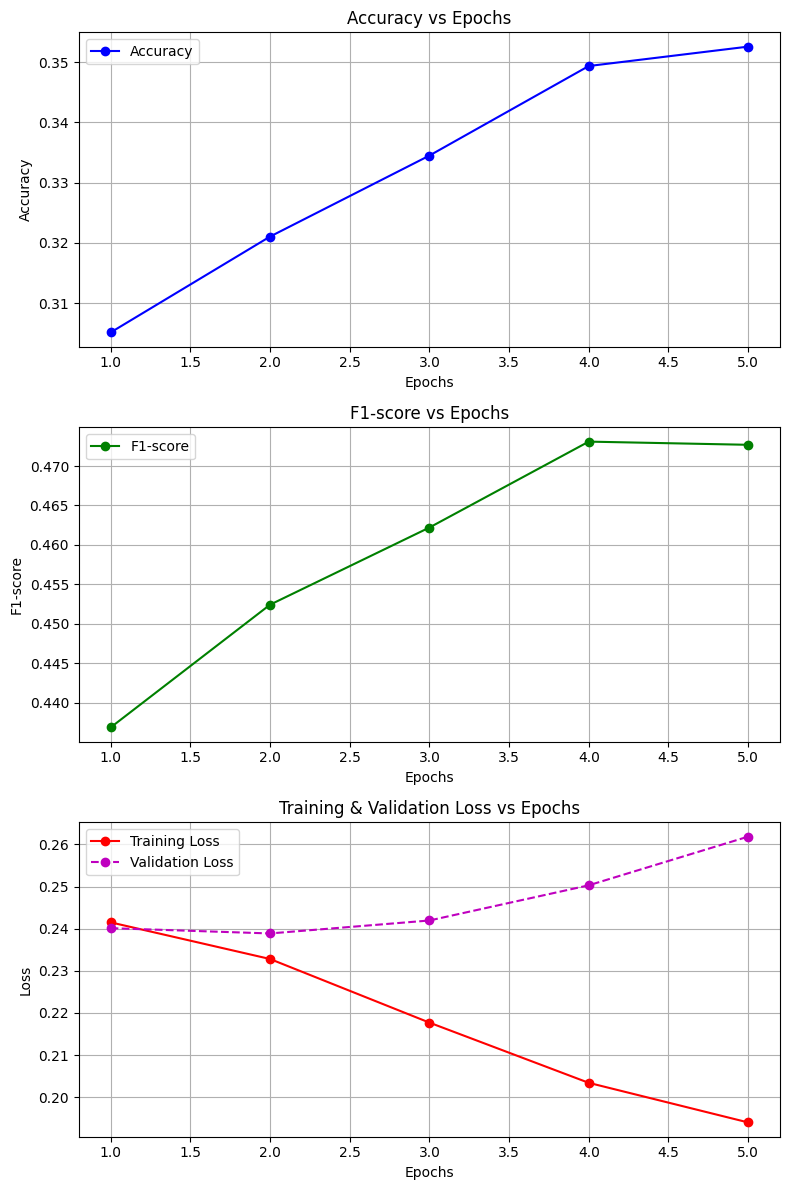

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Plot Accuracy vs Epochs
axs[0].plot(epochs, accuracy, marker='o', linestyle='-', color='b', label='Accuracy')
axs[0].set_title("Accuracy vs Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Accuracy")
axs[0].legend()
axs[0].grid()

# Plot F1-score vs Epochs
axs[1].plot(epochs, f1_score, marker='o', linestyle='-', color='g', label='F1-score')
axs[1].set_title("F1-score vs Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("F1-score")
axs[1].legend()
axs[1].grid()
# Plot Training & Validation Loss vs Epochs
axs[2].plot(epochs, training_loss, marker='o', linestyle='-', color='r', label='Training Loss')
axs[2].plot(epochs, validation_loss, marker='o', linestyle='--', color='m', label='Validation Loss')
axs[2].set_title("Training & Validation Loss vs Epochs")
axs[2].set_xlabel("Epochs")
axs[2].set_ylabel("Loss")
axs[2].legend()
axs[2].grid()
plt.tight_layout()
plt.show()